## Calculation of $t_{\text{rad}}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
filepath = './Parmentier 2/PTprofile(20bar)(Hd209458b)(0707).csv'
# filepath = './Parmentier 2/PTprofile(20bar)(WASP19b)(0710).csv'
# filepath = './Parmentier 2/PTprofile(20bar)(XO1b).csv'
data = pd.read_csv(filepath)

The radiative timescale is given by
$$
t_{\text{rad}} = \dfrac{c_p}{16\gamma_p\kappa_R\sigma_BT^3}
$$
where
- $c_p$ is the specific heat at constant pressure $=\dfrac{7}{2}R=\dfrac{7}{2}\dfrac{R_{\text{gas}}}{\mu}=\dfrac{7}{2}\dfrac{8.314\left[\mathrm{kg}\cdot\mathrm{m^2}\cdot\mathrm{s}^{−2}\cdot\mathrm{K}^{-1}\cdot\mathrm{mole}^{−1}\right]}{2.36\cdot 10^{-3}\left[\mathrm{kg}\cdot\mathrm{mole}^{-1}\right]}=12330.08474$ $\left[\mathrm{J}\cdot\mathrm{kg}^{-1}\cdot\mathrm{K}^{-1}\right]$
- $\gamma_p$ is the ratio between Planck and Rosseland mean $=\dfrac{\kappa_P}{\kappa_R}$ 
  - This can be obtained from the table, the name of it is called `Gp`
  - This is a constant
- $\kappa_R$ is the Rosseland mean opacity $\left[\mathrm{m^2}\cdot\mathrm{kg}^{-1}\right]$
  - This can be obtained from the table, the name of it is called `Kappa(m^2/kg)`
  - This is the function of pressure
- $\sigma_B$ is the Stefan-Boltzmann constant $=5.67037442\cdot10^{-8} \left[\mathrm{kg}\cdot\mathrm{s}^{-3}\cdot\mathrm{K}^{-4}\right]$
- $T$ is the temperature
  - This can be obtained from the table, the name of it is called `T(K)`
  - This is the function of pressure

11.2
12330.084745762711
0.000754711414656938


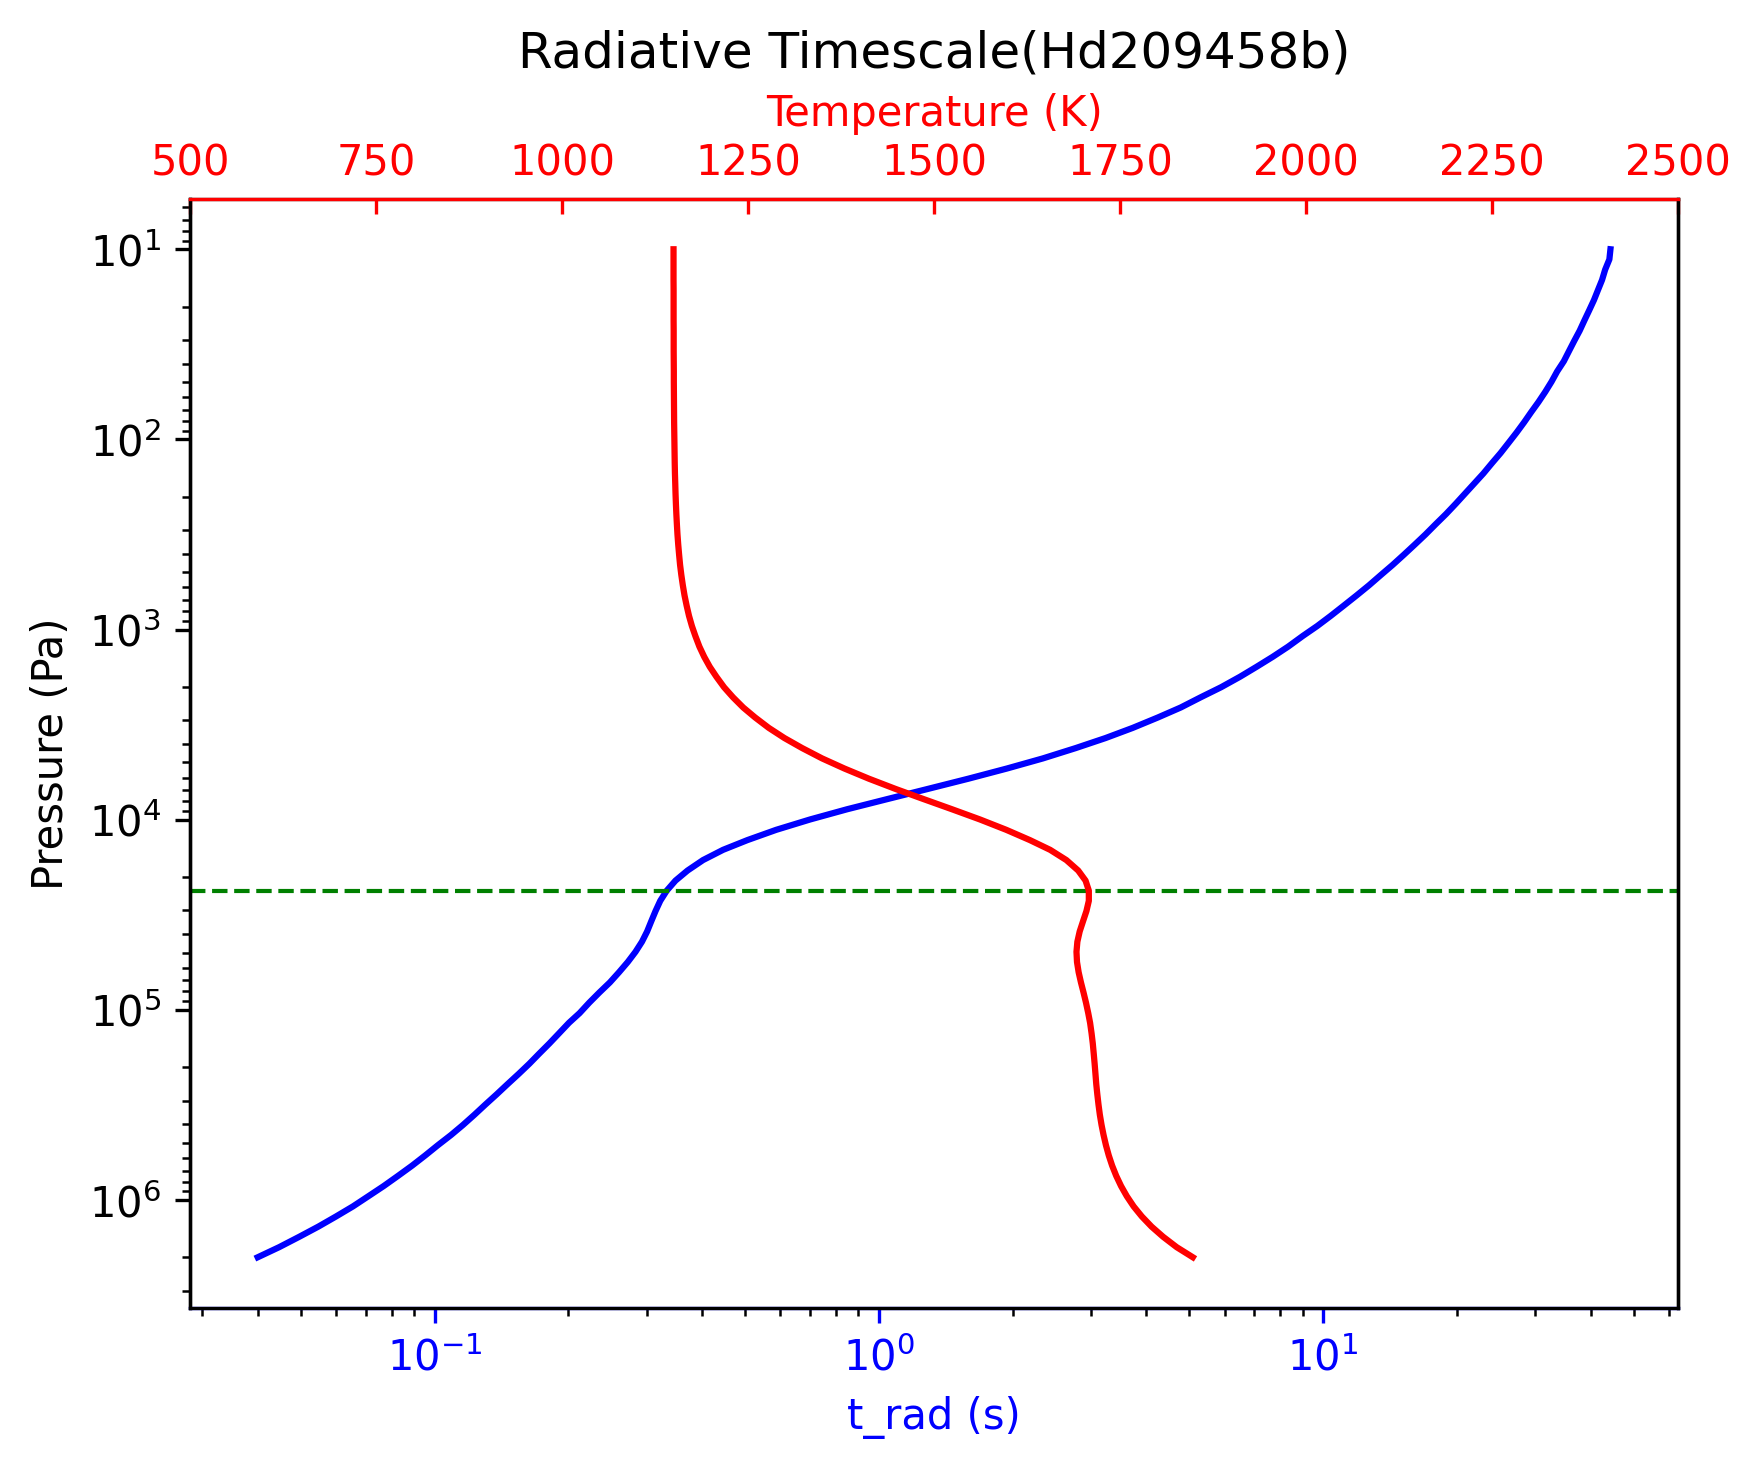

In [19]:
cp = 12330.08474
sigma_b = 5.67037442e-8
Gp = data['Gp'][0]
kappa_R = data['Kappa(m^2/kg)']
T = data['T(K)']
P = data['P(Pa)']
tau = data['tau']
# find the index where tau just > 1
idx = np.where(tau > 1)[0][0]

print(Gp)
print(3.5*8.314/2.36e-3)
# Calculate the radiative timescale
# t_rad = cp / (16 *Gp*kappa_R* sigma_b * T**3)
t_rad = cp / (16 *Gp* kappa_R*sigma_b * T**3)

print(cp/(16*Gp*sigma_b*300*1750**3))

# Create the figure and the first axis (timescale-P profile)
fig, ax1 = plt.subplots(dpi=300)
ax1.plot(t_rad, P, color='blue')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('t_rad (s)',color='blue')
ax1.set_ylabel('Pressure (Pa)')
ax1.spines['bottom'].set_color('blue')
ax1.invert_yaxis()
ax1.tick_params(axis='x', colors='blue')
ax1.set_title('Radiative Timescale(Hd209458b)')

# plot a horizontal line when tau just > 1
ax1.axhline(P[idx], color='green', linestyle='--', linewidth=1)

# plot a horizontal line


# Create the second axis (T-P profile) on top
ax2 = ax1.twiny()
ax2.plot(T, P, color='red')
ax2.set_xlabel('Temperature (K)',color='red')
ax2.set_xlim(500, 2500)
ax2.set_xscale('linear')
ax2.spines['top'].set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.tick_params(axis='x', which='both', direction='in',color='red')

plt.show()


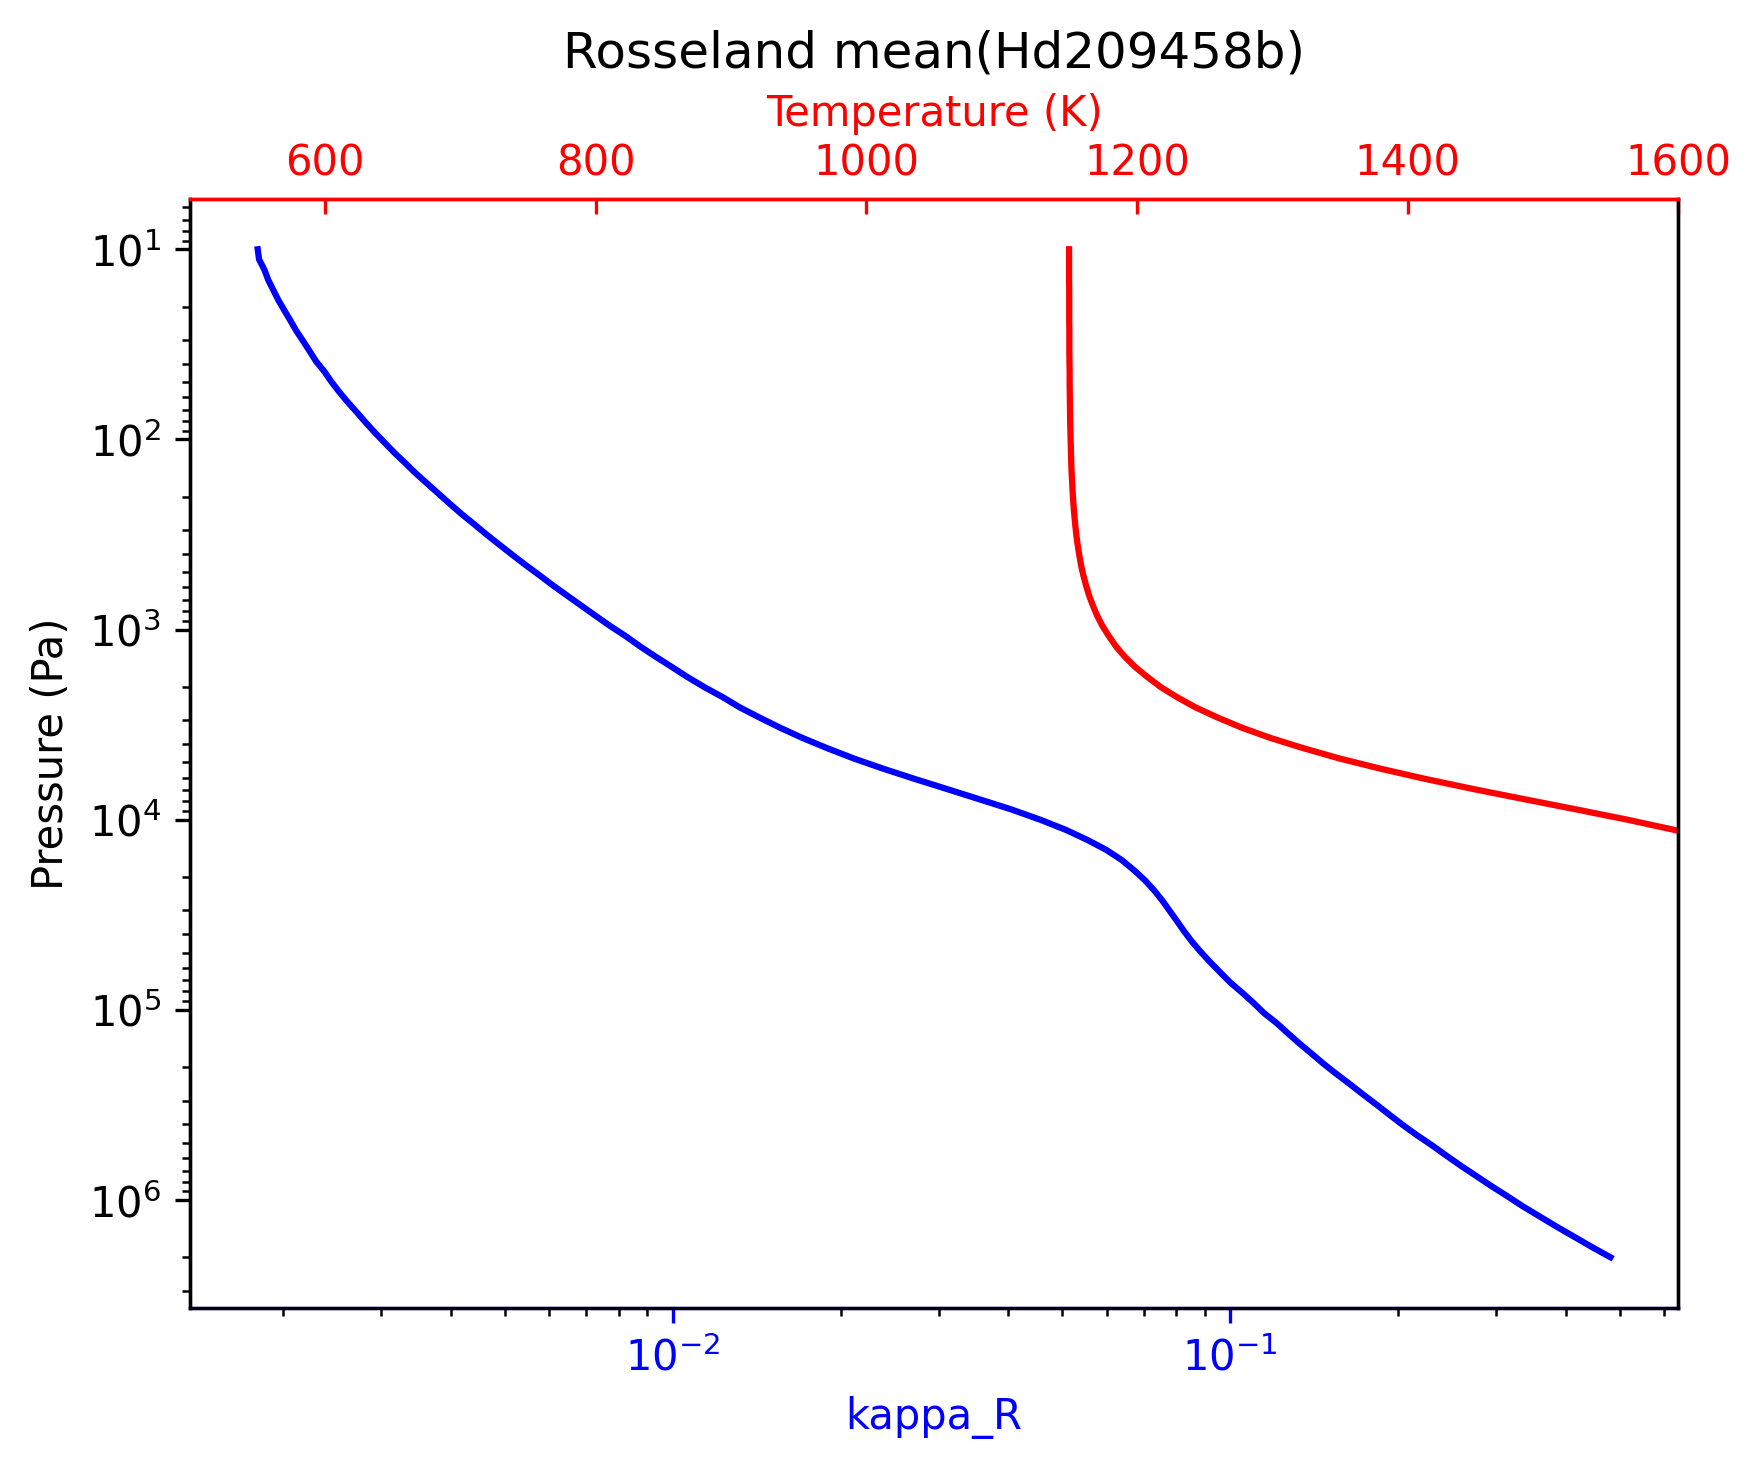

In [11]:
# Create the figure and the first axis (timescale-P profile)
fig, ax1 = plt.subplots(dpi=300)
ax1.plot(kappa_R, P, color='blue')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('kappa_R',color='blue')
ax1.set_ylabel('Pressure (Pa)')
ax1.spines['bottom'].set_color('blue')
ax1.invert_yaxis()
ax1.tick_params(axis='x', colors='blue')
ax1.set_title('Rosseland mean(Hd209458b)')

# Create the second axis (T-P profile) on top
ax2 = ax1.twiny()
ax2.plot(T, P, color='red')
ax2.set_xlabel('Temperature (K)',color='red')
ax2.set_xlim(500, 1600)
ax2.set_xscale('linear')
ax2.spines['top'].set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.tick_params(axis='x', which='both', direction='in',color='red')

plt.show()

## Plot the opacity

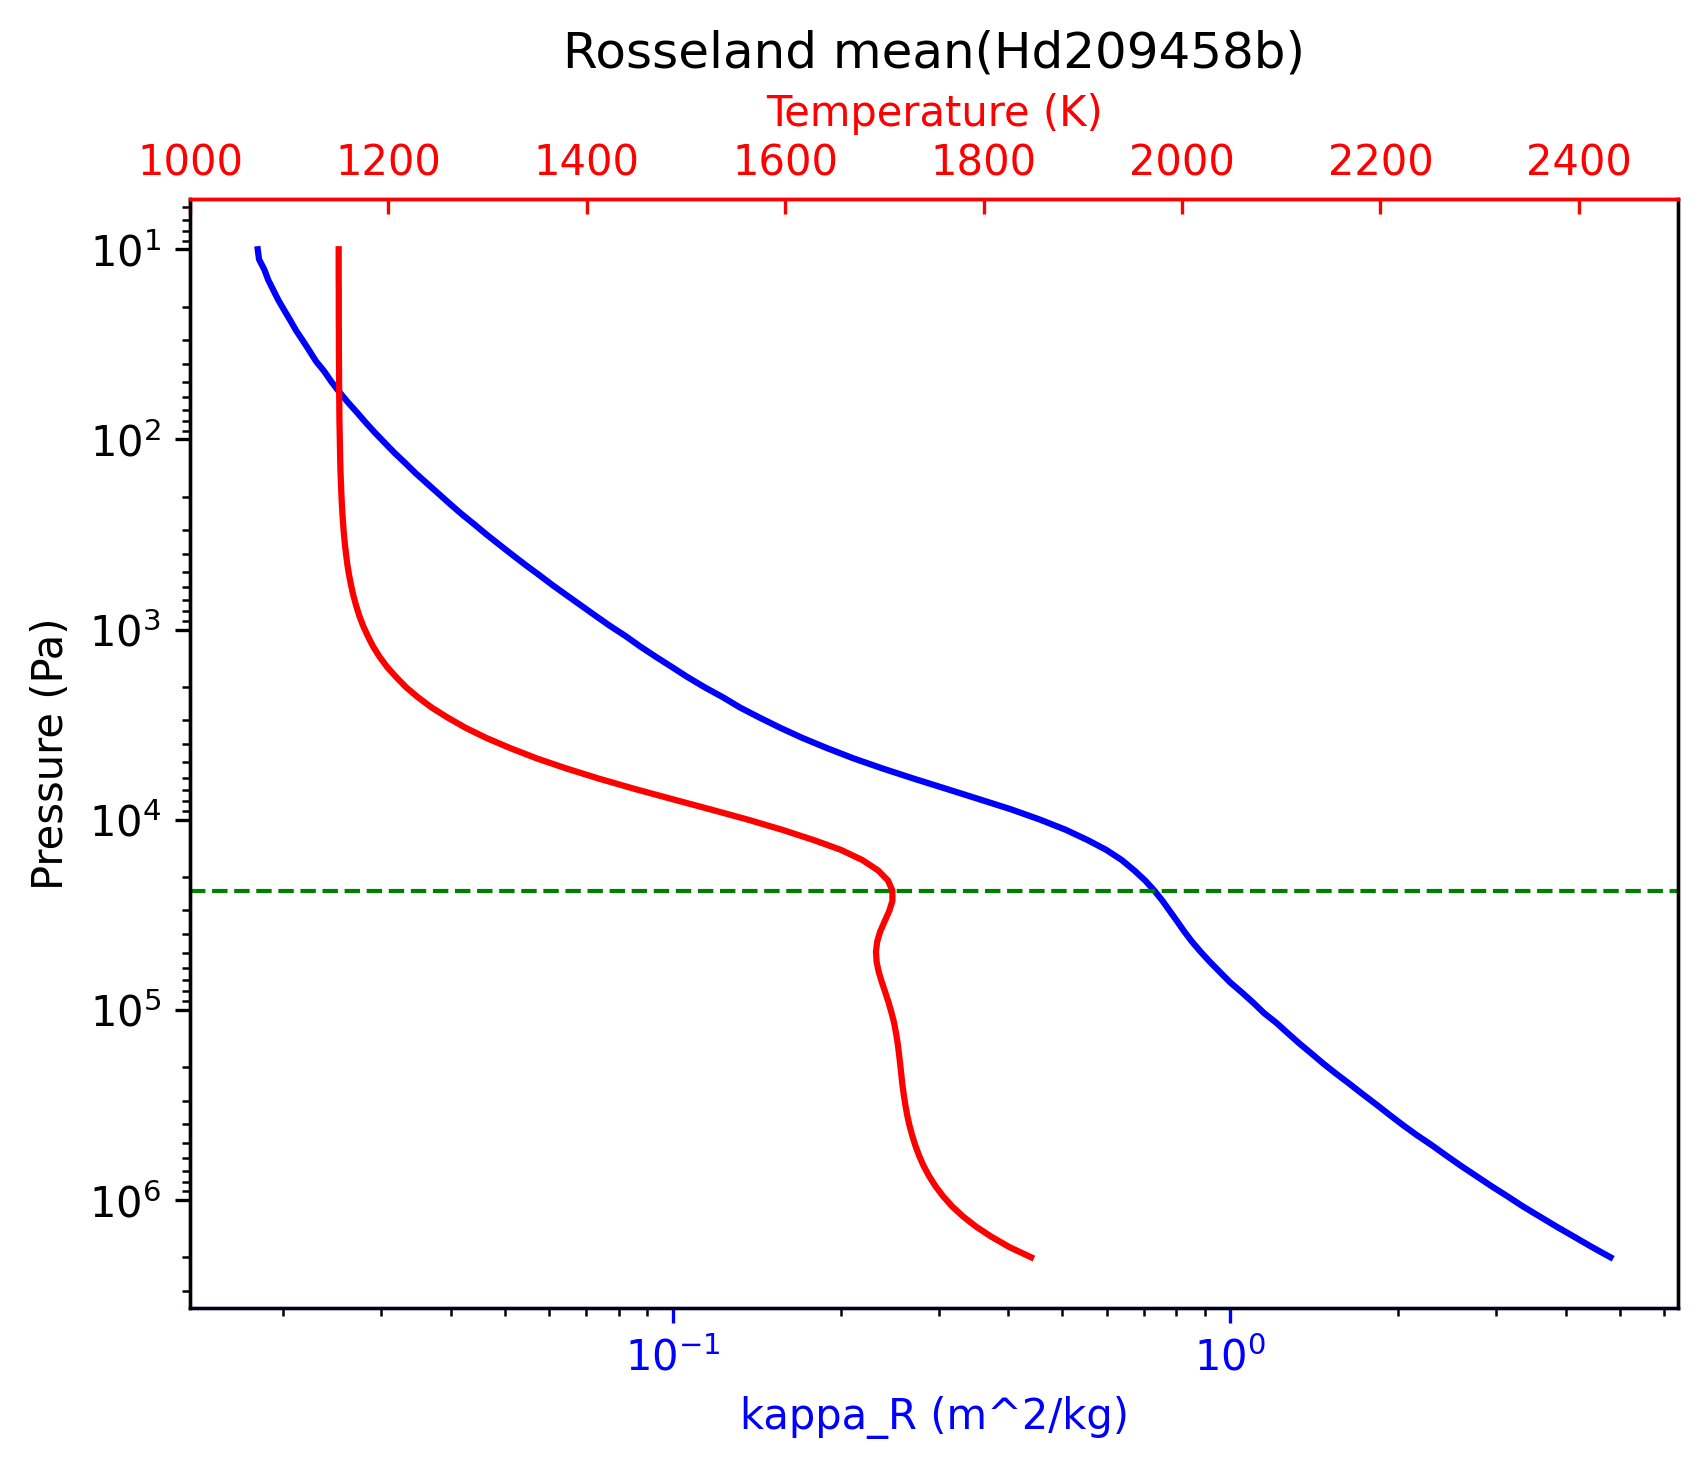

In [15]:
# plot the opacity profile
fig, ax1 = plt.subplots(dpi=300)
# kappa_R *= 10
ax1.plot(kappa_R, P, color='blue')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('kappa_R (m^2/kg)',color='blue')
ax1.set_ylabel('Pressure (Pa)')
ax1.spines['bottom'].set_color('blue')
ax1.invert_yaxis()
ax1.tick_params(axis='x', colors='blue')
ax1.set_title('Rosseland mean(Hd209458b)')

ax1.axhline(P[idx], color='green', linestyle='--', linewidth=1)

# Create the second axis (T-P profile) on top
ax2 = ax1.twiny()
ax2.plot(T, P, color='red')
ax2.set_xlabel('Temperature (K)',color='red')
ax2.set_xlim(1000, 2500)
ax2.set_xscale('linear')
ax2.spines['top'].set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.tick_params(axis='x', which='both', direction='in',color='red')


plt.show()
